In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1c8877a0067d510cf6cd8a1db6688fcd195335701b9651864dab968170921032
  Stored in directory: /Users/vkt/Library/Caches/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [15]:
df = pd.read_csv("Group 2.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6167,3154-CFSZG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.2,No
1,1527,0640-YJTPY,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1493.75,No
2,2397,3722-WPXTK,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes
3,2241,2908-WGAXL,Female,0,Yes,Yes,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1468.9,No
4,5194,1902-XBTFB,Male,0,No,Yes,22,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.5,Yes


In [21]:
from lifelines import KaplanMeierFitter


In [23]:
# Prepare the data for Kaplan-Meier fitting
T = df['tenure']  # Tenure represents the time
E = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Churn is the event indicator (1 if churned, 0 otherwise)


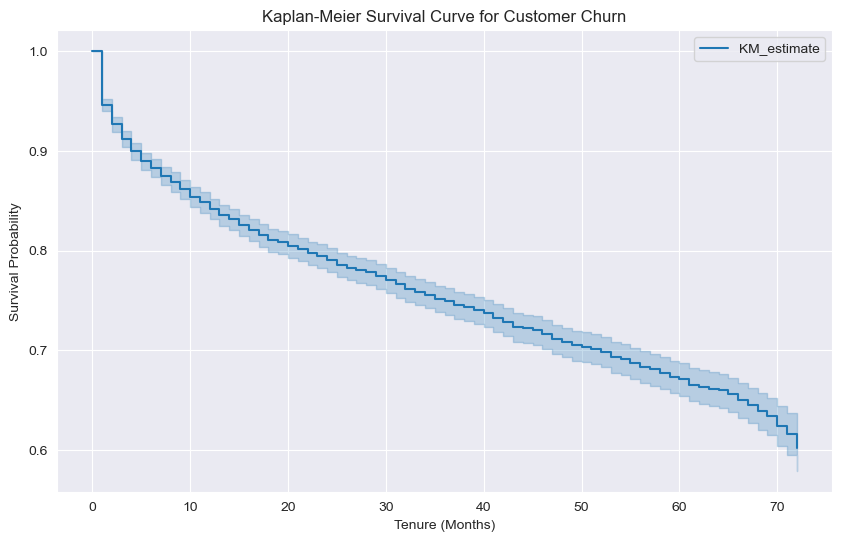

In [24]:
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

# Fit the model to the data
kmf.fit(T, event_observed=E)

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Customer Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


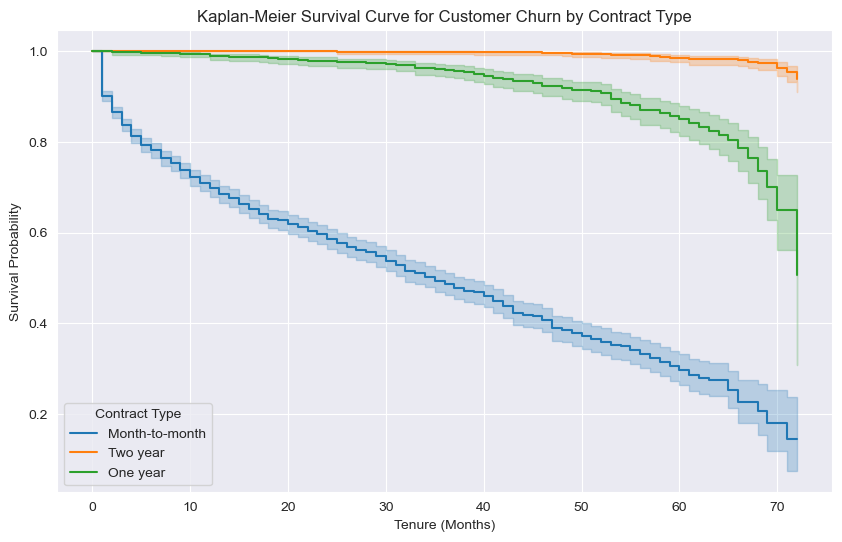

In [25]:
contract_types = df['Contract'].unique()

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each contract type and fit the KM model
for contract in contract_types:
    # Filter data for this contract type
    contract_data = df[df['Contract'] == contract]
    T = contract_data['tenure']
    E = contract_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Fit the model
    kmf.fit(T, event_observed=E, label=contract)
    
    # Plot survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve for Customer Churn by Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title='Contract Type')
plt.show()


if customers are around for more time, churn is less as compared others . Longer Contract is better than month v/s month payments






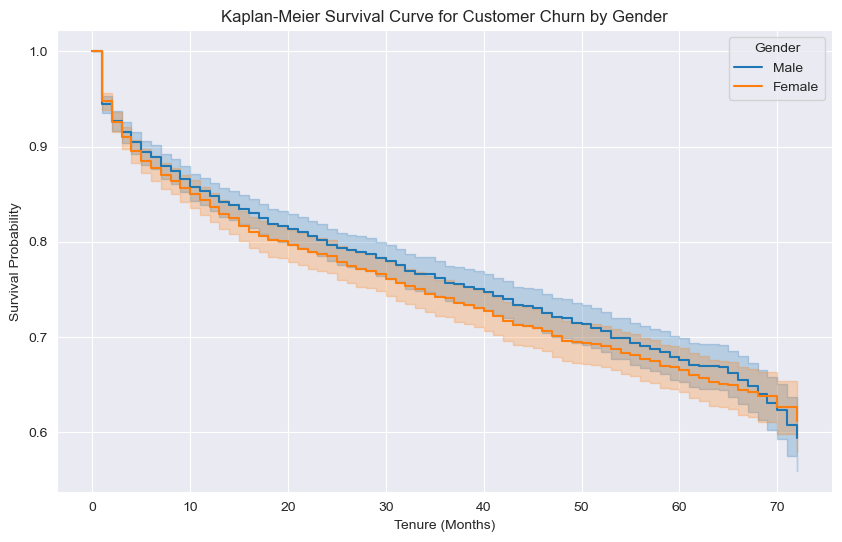

In [26]:
# Prepare the data for each gender
genders = df['gender'].unique()

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each gender and fit the KM model
for gender in genders:
    # Filter data for this gender
    gender_data = df[df['gender'] == gender]
    T = gender_data['tenure']  # Tenure
    E = gender_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Churn indicator
    
    # Fit the model
    kmf.fit(T, event_observed=E, label=gender)
    
    # Plot survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve for Customer Churn by Gender')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

Not much difference b/w 2 gender


Short-term customers (e.g., tenure ≤ 12 months)
Medium-term customers (e.g., tenure 13–36 months)
Long-term customers (e.g., tenure > 36 months)




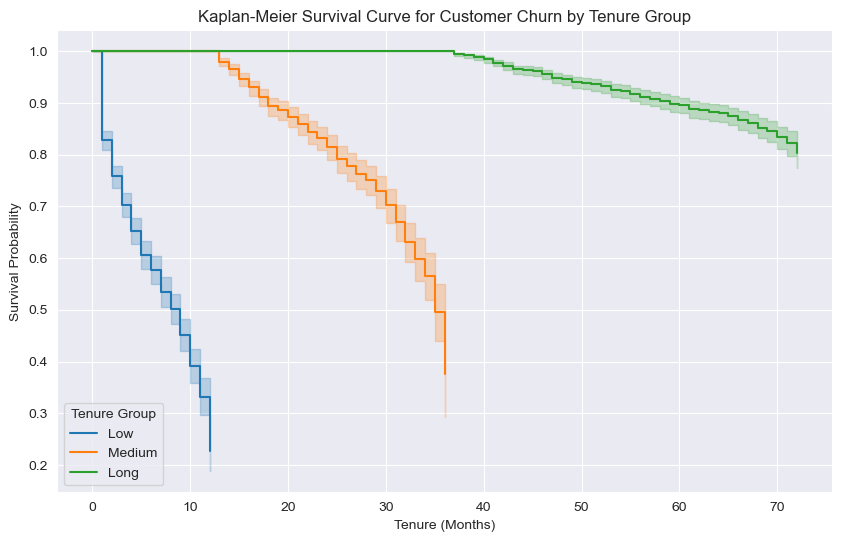

In [28]:
data = df
# Define tenure segments (you can adjust these thresholds as needed)
conditions = [
    (data['tenure'] <= 12),    # Short-term (0–12 months)
    (data['tenure'] > 12) & (data['tenure'] <= 36),  # Medium-term (13–36 months)
    (data['tenure'] > 36)  # Long-term (>36 months)
]

# Create labels for the tenure groups
tenure_labels = ['Low', 'Medium', 'Long']
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 36, data['tenure'].max()], labels=tenure_labels, include_lowest=True)

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each tenure group and fit the KM model
for tenure_group in tenure_labels:
    # Filter data for this tenure group
    group_data = data[data['tenure_group'] == tenure_group]
    T = group_data['tenure']  # Tenure
    E = group_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Churn indicator
    
    # Fit the model
    kmf.fit(T, event_observed=E, label=tenure_group)
    
    # Plot survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve for Customer Churn by Tenure Group')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title='Tenure Group')
plt.show()

Low tenure churn is very high as compared ot others 



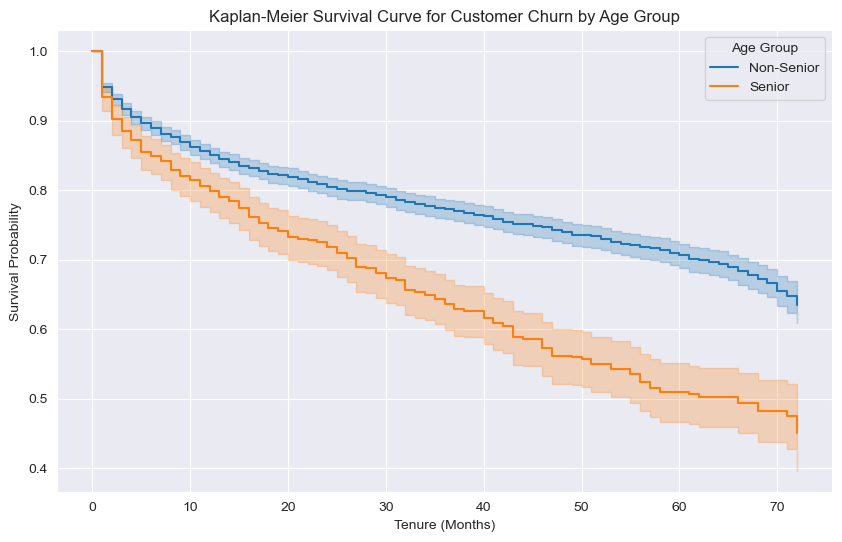

In [29]:
 #Prepare the data for each age group (Senior vs. Non-Senior)
age_groups = {0: 'Non-Senior', 1: 'Senior'}
data['age_group'] = data['SeniorCitizen'].map(age_groups)

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each age group and fit the KM model
for age_group in age_groups.values():
    # Filter data for this age group
    group_data = data[data['age_group'] == age_group]
    T = group_data['tenure']  # Tenure
    E = group_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Churn indicator
    
    # Fit the model
    kmf.fit(T, event_observed=E, label=age_group)
    
    # Plot survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve for Customer Churn by Age Group')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title='Age Group')
plt.show()

survival probability for seniors drops more quickly, this suggests that older customers are more likely to churn sooner.

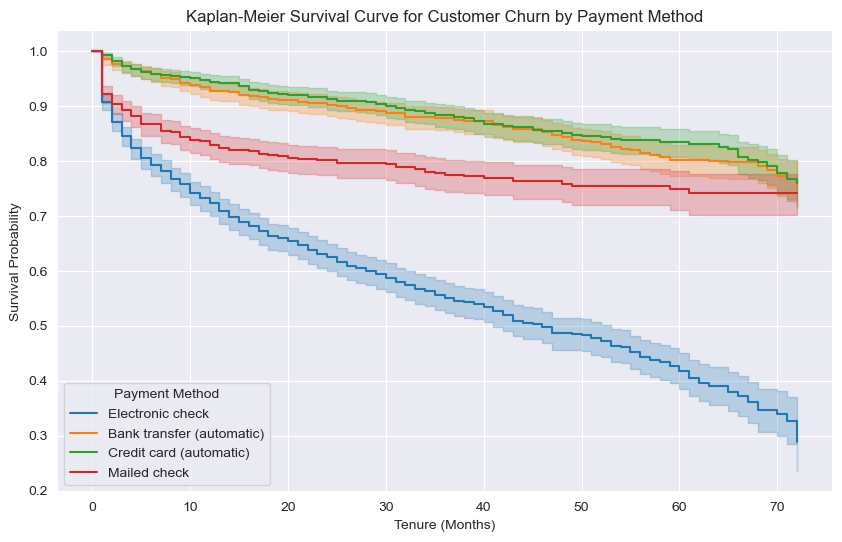

In [30]:
# Extract unique payment methods
payment_methods = data['PaymentMethod'].unique()

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each payment method and fit the KM model
for method in payment_methods:
    # Filter data for this payment method
    method_data = data[data['PaymentMethod'] == method]
    T = method_data['tenure']  # Tenure (months)
    E = method_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Churn indicator
    
    # Fit the model
    kmf.fit(T, event_observed=E, label=method)
    
    # Plot survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve for Customer Churn by Payment Method')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title='Payment Method')
plt.show()

Credit card payment is better than others 



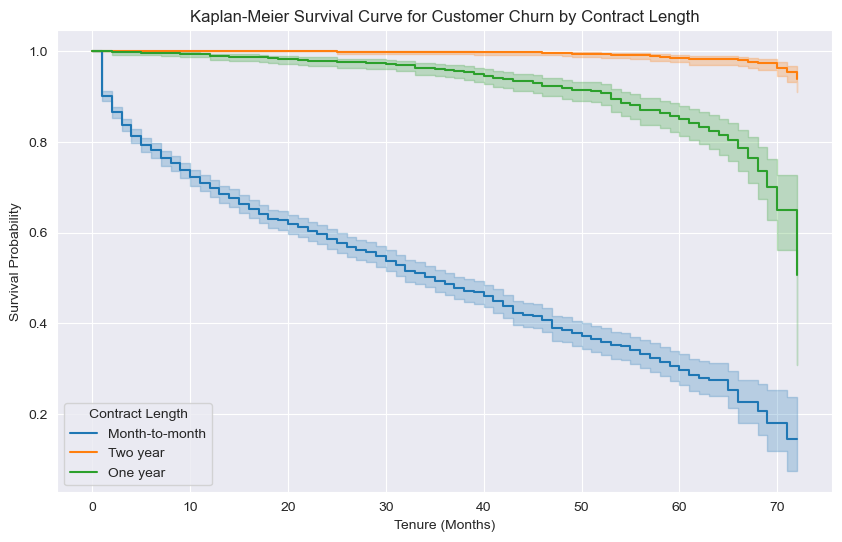

In [31]:
# Extract unique contract lengths
contract_lengths = data['Contract'].unique()

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each contract length and fit the KM model
for contract in contract_lengths:
    # Filter data for this contract length
    contract_data = data[data['Contract'] == contract]
    T = contract_data['tenure']  # Tenure (months)
    E = contract_data['Churn'].apply(lambda x: 1month-to-month contract has a steeper decline in survival probability, it indicates that customers with shorter contracts tend to churn more frequently. if x == 'Yes' else 0)  # Churn indicator
    
    # Fit the model
    kmf.fit(T, event_observed=E, label=contract)
    
    # Plot survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title('Kaplan-Meier Survival Curve for Customer Churn by Contract Length')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title='Contract Length')
plt.show()

month-to-month contract has a steeper decline in survival probability, it indicates that customers with shorter contracts tend to churn more frequently.